In [1]:
from scipy import stats
import pandas as pd
import seaborn as sns
import pingouin as pg
import numpy as np


sns.set(font='SimHei')  # 解决Seaborn中文显示问题
import warnings
warnings.filterwarnings('ignore') #忽视警告

In [2]:
mylist =["有香味"]*10 + ["无香味"]*10
mylist

['有香味',
 '有香味',
 '有香味',
 '有香味',
 '有香味',
 '有香味',
 '有香味',
 '有香味',
 '有香味',
 '有香味',
 '无香味',
 '无香味',
 '无香味',
 '无香味',
 '无香味',
 '无香味',
 '无香味',
 '无香味',
 '无香味',
 '无香味']

In [3]:
df = pd.DataFrame(
{"group": mylist,
 "study_effects":[19, 20, 24, 30, 31, 32, 30, 27, 22, 25,23, 22, 15, 16, 18, 12, 16, 19, 14, 25]
}
)
df

,group,study_effects
0,有香味,19
1,有香味,20
2,有香味,24
3,有香味,30
4,有香味,31
5,有香味,32
6,有香味,30
7,有香味,27
8,有香味,22
9,有香味,25


<AxesSubplot:xlabel='group', ylabel='study_effects'>

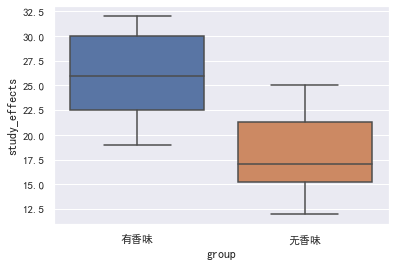

In [4]:
sns.boxplot(x = "group", y = "study_effects",data =df)

In [5]:
df.groupby("group").study_effects.mean()

group
无香味    18.0
有香味    26.0
Name: study_effects, dtype: float64

In [6]:
series_1 = df["study_effects"][df["group"] == "有香味"]
series_2 = df["study_effects"][df["group"] == "无香味"]

## 假设总体方差相等

$$t= \frac{(\bar{X}_{1}- \bar{X}_{2})-(\mu _{1}- \mu _{2})}{\sqrt{S_{p}^{2}(\frac{1}{n_{1}}+ \frac{1}{n_{2}})}}$$
其中，$$S_{p}^{2}= \frac{(n_{1}-1)S_{1}^{2}+(n_{2}-1)S_{2}^{2}}{(n_{1}-1)+(n_{2}-1)}$$

In [7]:
stats.ttest_ind(series_1,series_2,equal_var = True)

Ttest_indResult(statistic=4.0, pvalue=0.00083982931740856)

## 假设总体方差不相等

$$t^{\prime}= \frac{(\bar{X}_{1}- \bar{X}_{2})-(\mu _{1}- \mu _{2})}{\sqrt { \frac { s _ { 1 } ^ { 2 } } { n _ { 1 } ^ { 2 } } + \frac { s _ { 2 } ^ { 2 } } { n _ { 2 } } }}$$

In [8]:
stats.ttest_ind(series_1,series_2,equal_var = False)

Ttest_indResult(statistic=4.0, pvalue=0.0008577202971501111)

# F检验：检验两样本所来源的总体方差是否相等

检验统计量：$$F = S _ { 1 } ^ { 2 } / S _ { 2 } ^ { 2 }$$

In [6]:
# 计算F检验统计量
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1 - stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p #返回 F值 和 p值

0    19
1    20
2    24
3    30
4    31
5    32
6    30
7    27
8    22
9    25
Name: study_effects, dtype: int64

In [7]:
f_test(df.study_effects[:10],df.study_effects[10:])

(1.25, 0.37250084979351006)

# 作业题

从1-100这100个数中随机抽取出10个数字出来作为组一的样本；从30-70这41个数中随机抽取出10个数字出来作为组二的样本。
用独立样本t检验的方法检验这两个样本所来源的总体的均值是否相等（α=0.05）

In [14]:
a_list = list(range(1, 101))
b_list = list(range(30,71))

In [16]:
a_sample = np.random.choice(a_list, size =10,  replace = True)
b_sample = np.random.choice(b_list, size =10,  replace = True)

In [19]:
a_sample

array([92, 62,  7, 85,  3, 54,  3, 61, 40, 12])

In [20]:
b_sample

array([40, 56, 55, 44, 69, 53, 59, 54, 69, 70])

## 计算两样本的平均值

In [34]:
a_sample.mean()

41.9

In [35]:
b_sample.mean()

56.9

## 计算两个样本的方差


In [30]:
a_sample.var()

1042.4900000000002

In [31]:
b_sample.var()

94.89

## 用F检验判断两总体方差是否相等

In [28]:
f_test(a_sample,b_sample)

(10.986299926230373, 0.0007241349927614715)

结论：两总体的方差具有显著差异，因此使用独立样本t检验（异方差）

In [33]:
stats.ttest_ind(a_sample, b_sample, equal_var = False)

Ttest_indResult(statistic=-1.3343191535159358, pvalue=0.2099908978591268)